# Tutorial 2: NNs in pytorch

Today we learned about a _new_ hypothesis class **Neural Networkss** and we learned that a NN with a single hidden layer can approximate any smooth fucntion to arbitrary precision.

<img src="../figures/univ-appox-thm.jpg" >

But... we don't have any guarantees that this single layer NN is the most _efficient_ way to approximate a function!

We also learned how to build NNs in the `pytorch` library, so this afternoon we're going to have some fun putting all these pieces together! 🛠️👷🏻‍♀️

Notebook ``Going Deeper'' from Lukas Heinrich's TUM Deep Learning course.

In [8]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

Consider the funcion 

$$f(x) = f(x_1,x_2) = \sin(5x_1) + \cos(8x_2)$$

which we then map to a _rate_ via a sigmoid:

$$r(x) = \sigma(5 f(x)) \in (0,1)$$

and the binomial probability model 

$$p(x,z) = p(z|x)p(x) = \mathrm{Bernoulli}(z|r)p(x)$$

with a data distribution $p(x) = \mathrm{Uniform}(-2,2)$

The following function `get_data` samples from the above joint distribution, and returning features $x$ and labels $z$.


In [2]:
def get_data(N):
    x = np.random.uniform(-2,2,size = (N,2))
    x1,x2 = x[...,0],x[...,1]
    fx = np.sin(5*x1) + np.cos(8*x2)
    r = 1/(1+np.exp(-5*fx))
    y = np.random.binomial(1,r)
    return torch.tensor(x).float(),torch.tensor(y).float()

Sample a dataset of 1000 points and visualize it.

Text(0, 0.5, '$x_1$')

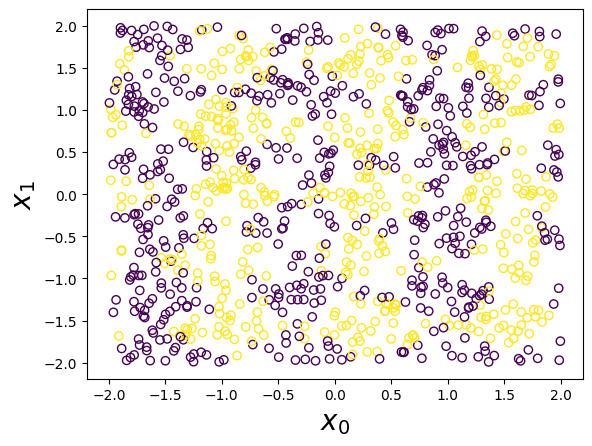

In [5]:
X,y = get_data(1000)
plt.scatter(X[:,0],X[:,1], 
            marker = 'o', facecolor = 'none', 
            edgecolor = plt.get_cmap('viridis')(y))
plt.xlabel('$x_0$',fontsize=20)
plt.ylabel('$x_1$',fontsize=20)

**Step 0:** Look at the data, e.g, what is $y$ for this example?

**Step 1:** Define a training function that accepts a pytorch model and implements the training loop, and returns the pytorch model and loss at each iteration of the training.

In [13]:
# Utility function: count the # of parameters
def count_parameters(model):
    return sum([sum(p.view(-1).shape) for p in model.parameters()])

In [14]:
def train_model(model):
    '''
    To do: Fill in with your new knowledge base how to train a pytorch model
    '''
    
    print(f'training model with {count_parameters(model)} parameters')
    losses = []
    opt = 
    for i in range(5000): # 5k training steps
        X,y = get_data(5000) # Draw 5000 samples
        p = model(X)
        loss = 
        
        '''
        Fill in the missing piece here
        '''
        
        losses.append(float(loss))
        if i % 1000 == 0:
            print(float(loss))
    return model,losses

**Step 2:** Define an MLP with one hidden layer and $H = 300$ hidden units.

**Step 3:** Now let's increase the size of the hypothesis class, increase H: 500, 1500, 7000 NNs

**Step 4:** Train a "deep neural network": four hidden layers with H=20 nodes each

**Step 5:** Compare the losses and the # of trainable parameters $\theta$, what have you learned?

**Hints:** 
- `plt.plot` to plot the loss curve
- `count_parameters(model)` to count the # of parameters

**Bonus:** Visualize the decision boundary for these two NNs